# Lab Week5: Plotting - Flight delays and cancellations
## DataSet: Australian Domestic Airlines 


You are tasked with analyzing the delays and cancellations in flights. 

You will be working with the Domestic Airlines - On Time Performance dataset from the Australian Government data. 

You will use the following columns:

- `Route`: Plane route Departure City - Arrival City
- `Airline`: name of the operating airline. If the value is “All Airlines”, the data given represents aggregated values.
- `Month`: month of the flight
- `Sectors_Flown`: how many flights were actually done for the given airline and route for the given month
- `Cancellations`: number of cancellations
- `Arrivals_Delayed`: Number of flights that arrived at the gate 15 minutes after the scheduled arrival time shown in the carriers' schedule.


<a id="import-libraries"></a>

## Step 1: Import libraries
This time you will need to import matplotlib in addition to pandas.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<a id="load-the-data"></a>

## Step 2: Load the data
- Read the csv file `otp_top5_routes.csv`.
- Verify the data schema using the `head()` and `info()` methods.
</div>

In [2]:
# your code here
df = pd.read_csv('otp_top5_routes.csv')

print(df.head())
print(df.info())

                Route Departing_Port Arriving_Port Airline       Month  \
0  Brisbane-Melbourne       Brisbane     Melbourne  Qantas  2004-01-01   
1     Brisbane-Sydney       Brisbane        Sydney  Qantas  2004-01-01   
2    Melbourne-Sydney      Melbourne        Sydney  Qantas  2004-01-01   
3     Sydney-Brisbane         Sydney      Brisbane  Qantas  2004-01-01   
4    Sydney-Melbourne         Sydney     Melbourne  Qantas  2004-01-01   

   Sectors_Scheduled  Sectors_Flown  Cancellations  Departures_On_Time  \
0              496.0            492            4.0               410.0   
1              683.0            677            6.0               576.0   
2              821.0            799           22.0               723.0   
3              686.0            682            4.0               614.0   
4              800.0            785           15.0               683.0   

   Arrivals_On_Time  Departures_Delayed  Arrivals_Delayed  Year  Month_Num  
0             427.0              

## Step 3: Cancellations by airline
The routes with the largest number of scheduled flights are, by far, the ones connecting Melbourne and Sydney, the two largest cities in Australia.

You want to visualize the cancellation rate per airline for the Melbourne-Sydney Route during the last reported month (2024-09-01) 

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the next cell to retrieve the rows corresponding to the last reported month (<code>2024-09-01</code>) for the <code>Melbourne-Sydney</code> Route.</li>
            <li>Group the data by <code>Airline</code> and sum the values in the <code>Cancellations</code> column to aggregate cancellations for each airline.</li>
            <li>Create a column chart to visualize the number of cancellations of each airline for the selected data.</li>
        </ol>
</div>


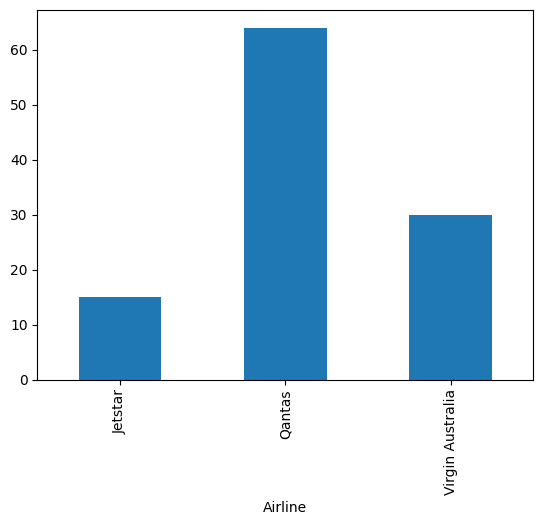

In [3]:
### START CODE HERE ###

# Filter for the Melbourne-Sydney route in September 2024
mel_syd_end_month = df[(df["Route"] == "Melbourne-Sydney") & (df["Month"] == "2024-09-01")]

# Group by Airline and sum the Cancellations column
grouped_cancellations = mel_syd_end_month.groupby("Airline")["Cancellations"].sum()

# Plot the column chart
grouped_cancellations.plot(kind="bar")
plt.show()

### END CODE HERE ###

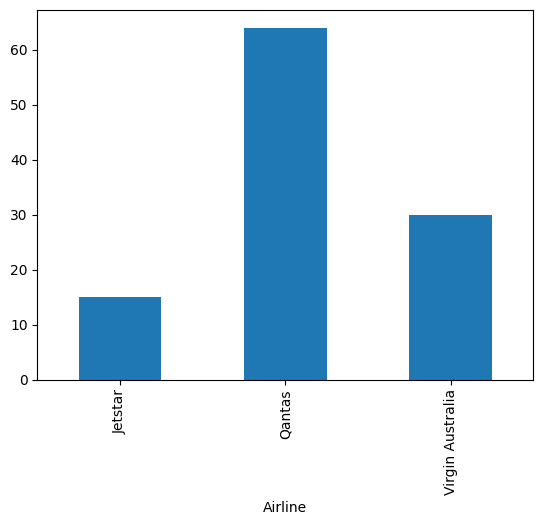

This column chart is ok-ish, but it could be better. Use the next cell to improve the column chart so it looks better.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to repeat the column chart, but this time apply the following enhancements:</li>
            <ul>
                <li>Give the chart an appropriate title</li>
                <li>Rotate the x-axis tick labels to 0 degrees (horizontal)</li>
                <li>Set a good y-axis label, showing what the values represent</li>
            </ul>
        </ol>
</div>

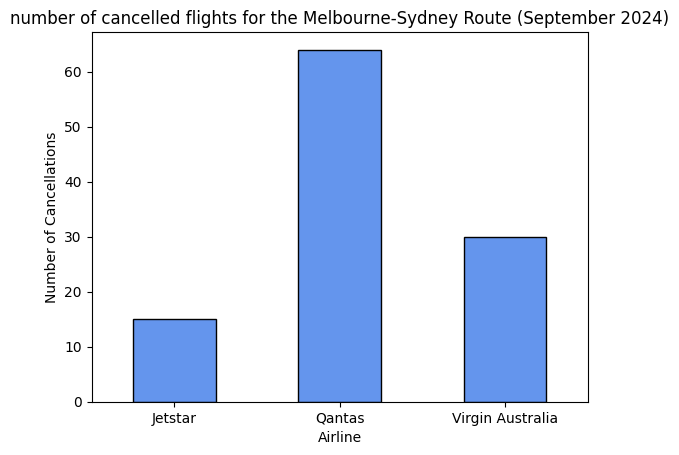

In [ ]:
### START CODE HERE ###

# repeat the column chart
grouped_cancellations.plot(kind="bar", color = "cornflowerblue", edgecolor = "black")
# add the title
plt.title("number of cancelled flights for the Melbourne-Sydney Route (September 2024)")
# rotate the xticks
plt.xticks(rotation=None)
# set the ylabel
plt.ylabel("Number of Cancellations")

plt.show()

### END CODE HERE ###

<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

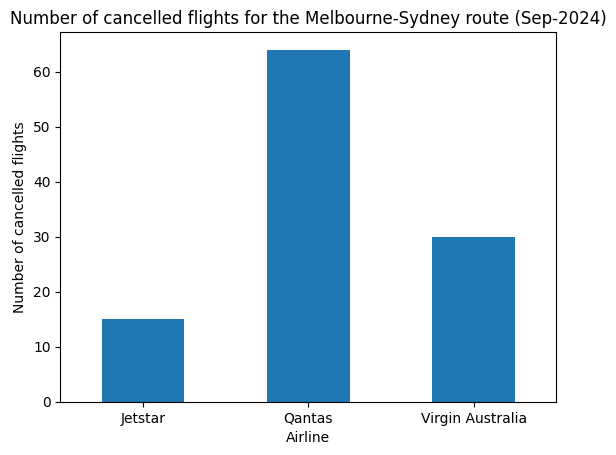

A good way to better understand how many flights were cancelled is to plot the cancellations together with the non-cancelled flights (Sectors_Flown column). 

This kind of information is particularly well suited for a **`stacked bar chart`**, as the sum of these two adds together to the total number of scheduled flights.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Save the two columns of interest: <code>Sectors_Flown</code>, <code>Cancellations</code> to the columns variable.</li>
            <li>Group by <code>Airline</code> and select the columns of interest to sum.</li>
            <li>Plot a stacked column chart (<code>kind="bar"</code>, <code>stacked=True</code>) showing the sum of cancellations and delays per quarter.</li>
            <li>Give the chart an appropriate title.</li>
            <li>Rotate the x-axis tick labels to 0 degrees (horizontal).</li>
            <li>Set a good y-axis label, showing what the values represent.</li>
            <li>In <code>plot()</code> method change the <code>stacked=False</code> to see how your chart changes from <code>stacked bar chart</code> to <code><strong>grouped bar chart</code>.</li>
        </ol>
</div> 

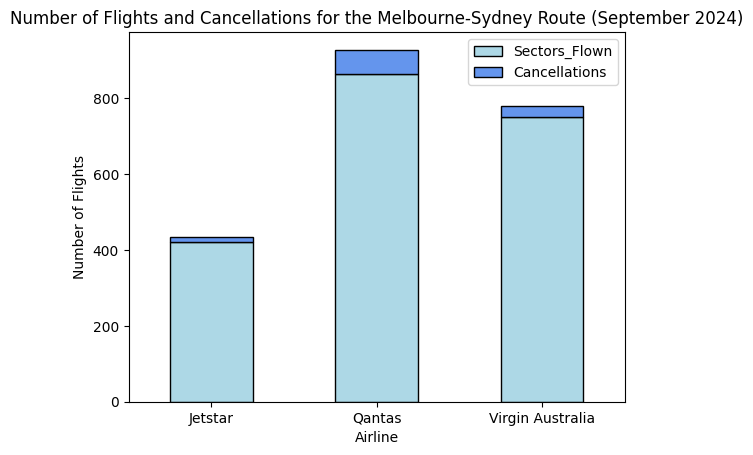

In [9]:
### START CODE HERE ###

# define the columns of interest

columns = ["Sectors_Flown", "Cancellations"]

# group by Airline and sum the columns of interest
grouped_flown_and_cancellations = mel_syd_end_month.groupby("Airline")[columns].sum()

# plot a stacked bar chart
grouped_flown_and_cancellations.plot(
    kind="bar", 
    stacked=True,
    color = ["lightblue", "cornflowerblue"],
    edgecolor = "black"
)

# add the title
plt.title("Number of Flights and Cancellations for the Melbourne-Sydney Route (September 2024)")
# rotate the xticks
plt.xticks(rotation=None)
# set the ylabel
plt.ylabel("Number of Flights")

plt.show()

### END CODE HERE ###

<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

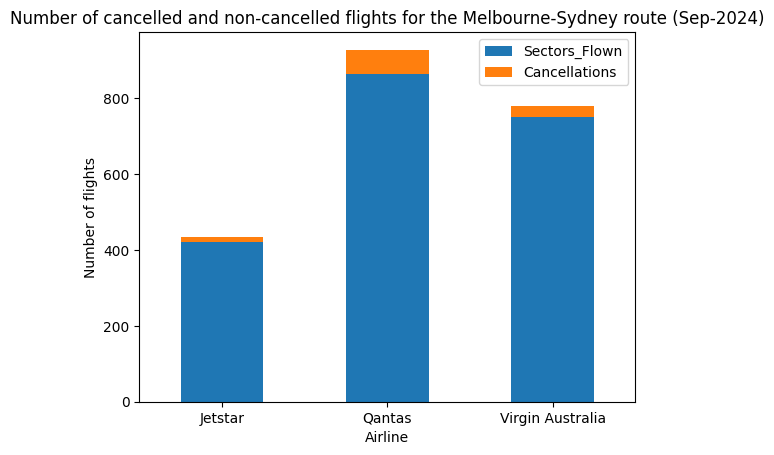

Based on this plot, which airline would you rather book? 

<a id="correlations"></a>

## Step 4: Correlations

As the travel agency aims to improve flight scheduling, it’s important to understand how delays and cancellations are connected. 

You decide to create a scatter plot of the number of delayed flights vs. number of cancellations and see if you can reveal any patterns, helping you identify correlations that can inform safer booking recommendations.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the following cell to create a scatter plot of the "Cancellations" and "Arrivals_Delayed" columns</li>
            <ul>
                <li>The plot <code>kind</code> is "scatter"</li>
                <li>Change the markers to have diamond shapes ("D"), and color "forestgreen". You can do this configuring the arguments  <code>marker</code> and <code>color</code> respectively</li>
            </ul>
            <li>Use Matplotlib to enhance the plot:</li>
            <ul>
                <li>Add an appropriate title.</li> 
                <li>Change the "Arrivals_Delayed" axis label to "Delayed Arrivals"
            </ul>
            <li>Print the correlation between the features and compare with the scatter plot</li>
        </ol>
</div>

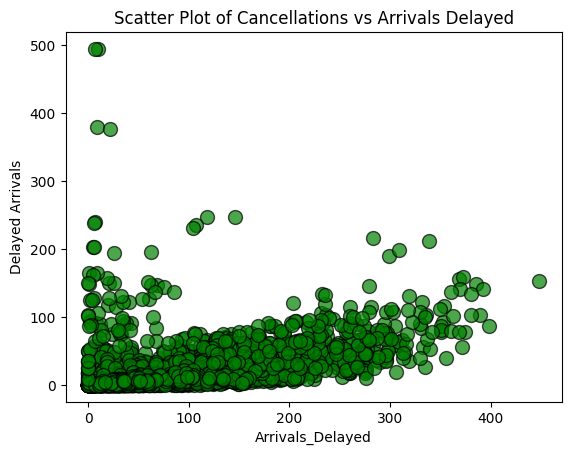

Correlation: 0.4608816362446454


In [5]:
### START CODE HERE ###

# create the scatter plot. Set the marker configuration
df.plot(kind="scatter", x="Arrivals_Delayed", y="Cancellations", color="green", marker="o", edgecolor="black", s=100, alpha=0.7)
# set the title
plt.title("Scatter Plot of Cancellations vs Arrivals Delayed")
# change the Arrivals_Delayed label
plt.ylabel("Delayed Arrivals")

plt.show()

### END CODE HERE ###

# print the correlation
print("Correlation:", df["Cancellations"].corr(df["Arrivals_Delayed"]))


<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


```
Correlation: 0.5303277412615732
```

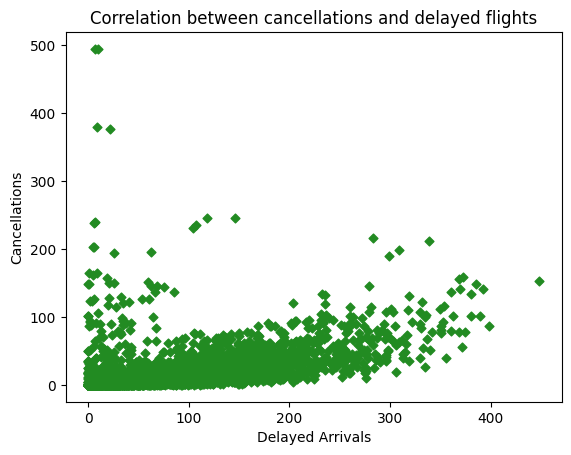

Correlation: 0.4608816362446454


## Step 5: Understanding the distribution of cancellations
So far you were able to identify which routes suffered more cancellations, and which airlines where responsible for those cancellations. 

Now you want to know the distribution of variable. 

### Histograms
<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>In the next cell, create a column called "Cancellation_Rates" that contains the ratio of canceled flights to the total number of scheduled flights</li>
            <li>Plot the distribution of the cancellation rates.</li>
            <ul>
                <li> Use .hist() (or .plot(kind="hist")) and set <code>bins</code> to 100.</li>
                <li> Change the x-axis label to "Cancellation Rates"</li>
                <li> Add the title "Cancellation rates distribution"</li>
            </ul>
        </ol>
</div>


ValueError: supplied range of [0.0, inf] is not finite

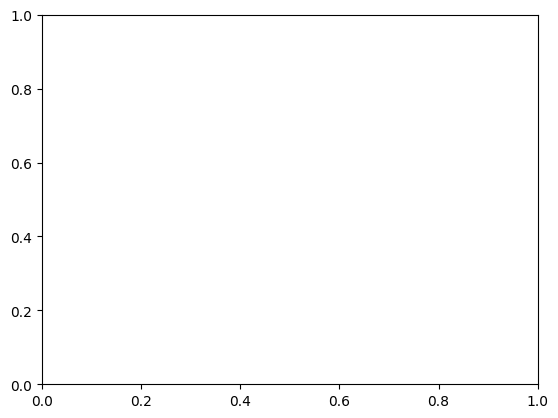

In [17]:
### START CODE HERE ###

# find the proportion of cancelled flights (divide cancellations by the scheduled flights)
df["Cancellation_Rates"] = df["Cancellations"] / df["Sectors_Flown"]

# plot the histogram - call hist function over df["Cancellation_Rates"]
df["Cancellation_Rates"].hist(bins=100, color="skyblue", edgecolor="black")

# change xlabel
plt.xlabel("Cancellation Rates")

# add ylabel
plt.ylabel("Count")

# add the title
plt.title("Cancellation Rates Distribution")

plt.show()

### END CODE HERE ###

<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

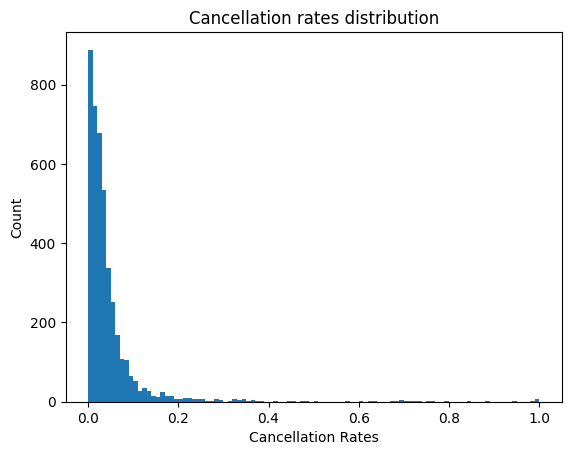

That is a great visualization. It is telling you that most cancellation rates are small(<1%), but that the distribution does have a long tail of outliers.

### Boxplots
Another way to visualize the distribution of cancellation rates is using a boxplot. 

Boxplots allow you to compare the median, spread (quartiles), and identify any outliers across categories like airlines, providing a more concise view of the data’s variability. 
<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to create a boxplot for the cancellation rate</li>
            <ul>
                <li> Can you make connections between the boxplot and the histogram from the previous section?</li>
            </ul>
        </ol>
</div>

<Axes: >

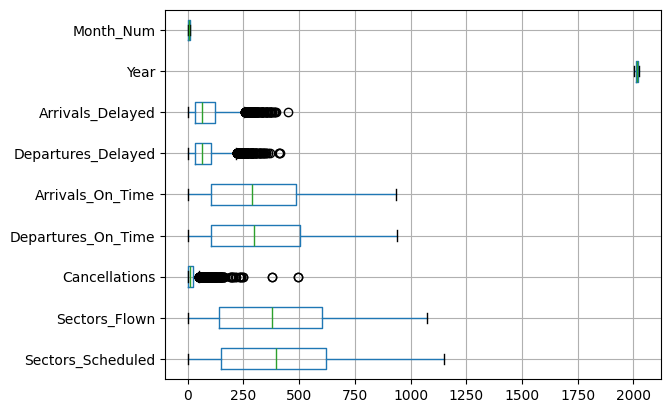

In [ ]:
df.boxplot(column=None, vert=False, grid=False)

you can also call plot with kind='box' over `Cancellation_Rates` column.
```python
df["Cancellation_Rates"].plot(kind='box', vert=False)
```

<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

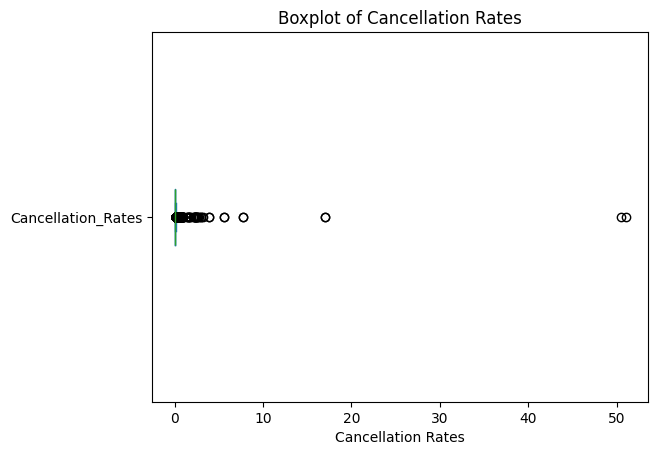

In [ ]:
df["Cancellation_Rates"].plot(kind="box", vert=False, grid=False, )
plt.xlabel("Cancellation Rates")
plt.show()


### Cancellation rates by airline

Boxplot is especially useful when comparing several distributions.

What if you want to see how the airlines differ? 

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ul>
            <li>Use the cell below to create a boxplot for the cancellation rate based on the airline 

        
    
</div>

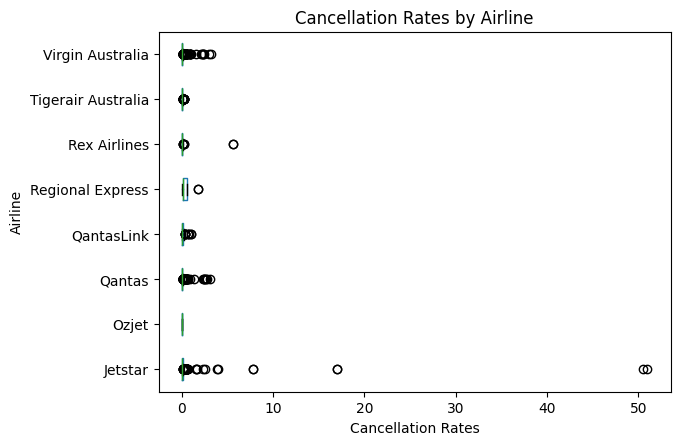

In [22]:
df.boxplot(column="Cancellation_Rates", by="Airline", vert=False, grid=False)

plt.xlabel("Cancellation Rates")
plt.ylabel("Airline")
plt.title("Cancellation Rates by Airline")
plt.suptitle("")
plt.show()

<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<Axes: title={'center': 'Cancellation_Rates'}, ylabel='Airline'>

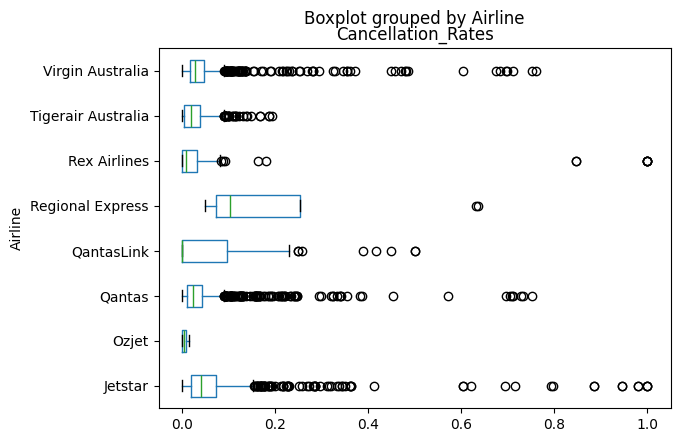

There are some really interesting insights you can get from here! 
- which is the airline with the biggest median cancellation rate? 
- Which are the ones with the largest outliers?
- Which airline seems more secure?

- Regional Express shows the highest median cancellation rate
- QantasLink and Jestar have the mort extreme outliers
- Virgin Austrailia and Tigerair Austrailia have the lowest, most consistent rates

By default, `Pandas`’ boxplot is just a wrapper around `Matplotlib`. If you want a nicer palette, you can use `seaborn` package. 

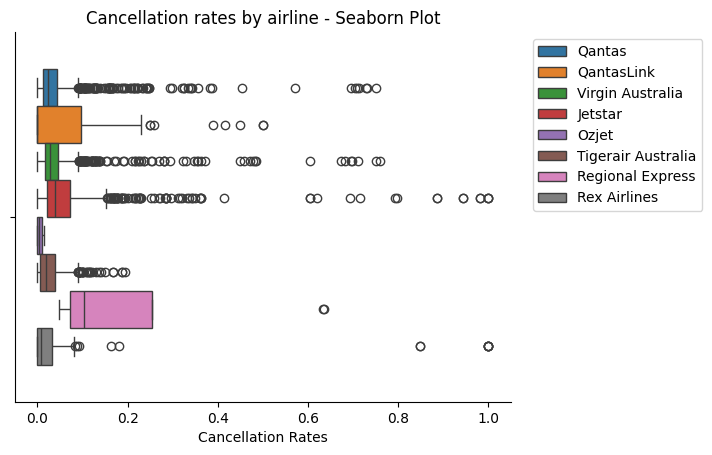

In [68]:
#create the boxplot. Use hue to separate by airline
sns.boxplot(data=df, x="Cancellation_Rates", hue="Airline")
# change xlabel
plt.xlabel("Cancellation Rates")
# add the title
plt.title("Cancellation rates by airline - Seaborn Plot")
# change the legend position
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
# Remove the spines
sns.despine()

plt.show()